# Hypothesis Evaluation

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import time 
from sklearn.datasets import load_boston
from matplotlib import cm
import seaborn as sns
from scipy import stats

In [2]:
boston_dataset = load_boston()

/usr/local/Caskroom/miniconda/base/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Californ

In [3]:
dataFrame = pd.DataFrame(boston_dataset.data, columns = boston_dataset.feature_names)

In [4]:
dataFrame['MEDV'] = boston_dataset.target

In [5]:
input_feature = 'RM'
target = 'MEDV'

## Reshuffle of the Data

In [6]:
dataFrame_shuffled = dataFrame.sample(frac=1)

In [7]:
x = dataFrame_shuffled[[input_feature]].values
y = dataFrame_shuffled[[target]].values
X = dataFrame_shuffled[[input_feature]]
Y = dataFrame_shuffled[[target]]

# Split the dataset into training, validation and test sets

In [8]:
train_X = X.iloc[:int(X.shape[0]*0.6),:]
train_Y = Y.iloc[:int(Y.shape[0]*0.6),:]

val_X = X.iloc[int(X.shape[0]*0.6):int(X.shape[0]*0.6) + int(X.shape[0]*0.2),:]
val_Y = Y.iloc[int(Y.shape[0]*0.6):int(Y.shape[0]*0.6) + int(Y.shape[0]*0.2),:]

test_X = X.iloc[int(X.shape[0]*0.6) + int(X.shape[0]*0.2):,:]
test_Y = Y.iloc[int(Y.shape[0]*0.6) + int(Y.shape[0]*0.2):,:]

In [9]:
print(train_X.shape, train_Y.shape)
print(val_X.shape, val_Y.shape)
print(test_X.shape, test_Y.shape)

(303, 1) (303, 1)
(101, 1) (101, 1)
(102, 1) (102, 1)


# Fit the different models on the training set

In [10]:
def polinomyal_features(dataFrame, degree, column):
    
    new_dataFrame = dataFrame.copy()
    for i in range(1,degree):
        column_name = '('+column + ')**{}'.format(i+1)
        new_dataFrame[column_name] = dataFrame[column]**(i+1)

    return new_dataFrame

In [11]:
def normalEquationReg(x, y, lamb = 0.0):
    start_time = time.time()
    
    identity_r = np.eye(x.shape[1])
    identity_r[0][0] = 0
    
    theta = np.linalg.pinv(x.T.dot(x) + lamb * identity_r).dot(x.T).dot(y)
    
    end_time = time.time()
    
    etime = np.round(end_time*1000 - start_time*1000, 3) # [ms]
    return theta, etime

In [12]:
x_poly_1_train = polinomyal_features(train_X,1,input_feature)
x_poly_2_train = polinomyal_features(train_X,2,input_feature)
x_poly_3_train = polinomyal_features(train_X,3,input_feature)
x_poly_4_train = polinomyal_features(train_X,4,input_feature)
x_poly_5_train = polinomyal_features(train_X,5,input_feature)
x_poly_6_train = polinomyal_features(train_X,6,input_feature)
x_poly_7_train = polinomyal_features(train_X,7,input_feature)
x_poly_8_train = polinomyal_features(train_X,8,input_feature)

x_poly_1_val = polinomyal_features(val_X,1,input_feature)
x_poly_2_val = polinomyal_features(val_X,2,input_feature)
x_poly_3_val = polinomyal_features(val_X,3,input_feature)
x_poly_4_val = polinomyal_features(val_X,4,input_feature)
x_poly_5_val = polinomyal_features(val_X,5,input_feature)
x_poly_6_val = polinomyal_features(val_X,6,input_feature)
x_poly_7_val = polinomyal_features(val_X,7,input_feature)
x_poly_8_val = polinomyal_features(val_X,8,input_feature)

x_poly_1_test = polinomyal_features(test_X,1,input_feature)
x_poly_2_test = polinomyal_features(test_X,2,input_feature)
x_poly_3_test = polinomyal_features(test_X,3,input_feature)
x_poly_4_test = polinomyal_features(test_X,4,input_feature)
x_poly_5_test = polinomyal_features(test_X,5,input_feature)
x_poly_6_test = polinomyal_features(test_X,6,input_feature)
x_poly_7_test = polinomyal_features(test_X,7,input_feature)
x_poly_8_test = polinomyal_features(test_X,8,input_feature)

In [13]:
x_linear_train = np.c_[np.ones((x_poly_1_train.shape[0],1)), x_poly_1_train]
x_poly_2_train_int = np.c_[np.ones((x_poly_2_train.shape[0],1)), x_poly_2_train]
x_poly_3_train_int = np.c_[np.ones((x_poly_3_train.shape[0],1)), x_poly_3_train]
x_poly_4_train_int = np.c_[np.ones((x_poly_4_train.shape[0],1)), x_poly_4_train]
x_poly_5_train_int = np.c_[np.ones((x_poly_5_train.shape[0],1)), x_poly_5_train]
x_poly_6_train_int = np.c_[np.ones((x_poly_6_train.shape[0],1)), x_poly_6_train]
x_poly_7_train_int = np.c_[np.ones((x_poly_7_train.shape[0],1)), x_poly_7_train]
x_poly_8_train_int = np.c_[np.ones((x_poly_8_train.shape[0],1)), x_poly_8_train]

x_linear_val = np.c_[np.ones((val_X.shape[0],1)), val_X]
x_poly_2_val_int = np.c_[np.ones((x_poly_2_val.shape[0],1)), x_poly_2_val]
x_poly_3_val_int = np.c_[np.ones((x_poly_3_val.shape[0],1)), x_poly_3_val]
x_poly_4_val_int = np.c_[np.ones((x_poly_4_val.shape[0],1)), x_poly_4_val]
x_poly_5_val_int = np.c_[np.ones((x_poly_5_val.shape[0],1)), x_poly_5_val]
x_poly_6_val_int = np.c_[np.ones((x_poly_6_val.shape[0],1)), x_poly_6_val]
x_poly_7_val_int = np.c_[np.ones((x_poly_7_val.shape[0],1)), x_poly_7_val]
x_poly_8_val_int = np.c_[np.ones((x_poly_8_val.shape[0],1)), x_poly_8_val]

x_linear_test = np.c_[np.ones((test_X.shape[0],1)), test_X]
x_poly_2_test_int = np.c_[np.ones((x_poly_2_test.shape[0],1)), x_poly_2_test]
x_poly_3_test_int = np.c_[np.ones((x_poly_3_test.shape[0],1)), x_poly_3_test]
x_poly_4_test_int = np.c_[np.ones((x_poly_4_test.shape[0],1)), x_poly_4_test]
x_poly_5_test_int = np.c_[np.ones((x_poly_5_test.shape[0],1)), x_poly_5_test]
x_poly_6_test_int = np.c_[np.ones((x_poly_6_test.shape[0],1)), x_poly_6_test]
x_poly_7_test_int = np.c_[np.ones((x_poly_7_test.shape[0],1)), x_poly_7_test]
x_poly_8_test_int = np.c_[np.ones((x_poly_8_test.shape[0],1)), x_poly_8_test]

In [14]:
theta_linear, _ = normalEquationReg(x_linear_train, train_Y)
theta_poly_2, _ = normalEquationReg(x_poly_2_train_int, train_Y)
theta_poly_3, _ = normalEquationReg(x_poly_3_train_int, train_Y)
theta_poly_4, _ = normalEquationReg(x_poly_4_train_int, train_Y)
theta_poly_5, _ = normalEquationReg(x_poly_5_train_int, train_Y)
theta_poly_6, _ = normalEquationReg(x_poly_6_train_int, train_Y)
theta_poly_7, _ = normalEquationReg(x_poly_7_train_int, train_Y)
theta_poly_8, _ = normalEquationReg(x_poly_8_train_int, train_Y)

In [15]:
X_2_train, yhat_2_train = zip(*sorted(zip(train_X.values,x_poly_2_train_int.dot(theta_poly_2))))
X_3_train, yhat_3_train = zip(*sorted(zip(train_X.values,x_poly_3_train_int.dot(theta_poly_3))))
X_4_train, yhat_4_train = zip(*sorted(zip(train_X.values,x_poly_4_train_int.dot(theta_poly_4))))
X_5_train, yhat_5_train = zip(*sorted(zip(train_X.values,x_poly_5_train_int.dot(theta_poly_5))))
X_6_train, yhat_6_train = zip(*sorted(zip(train_X.values,x_poly_6_train_int.dot(theta_poly_6))))
X_7_train, yhat_7_train = zip(*sorted(zip(train_X.values,x_poly_7_train_int.dot(theta_poly_7))))
X_8_train, yhat_8_train = zip(*sorted(zip(train_X.values,x_poly_8_train_int.dot(theta_poly_8))))

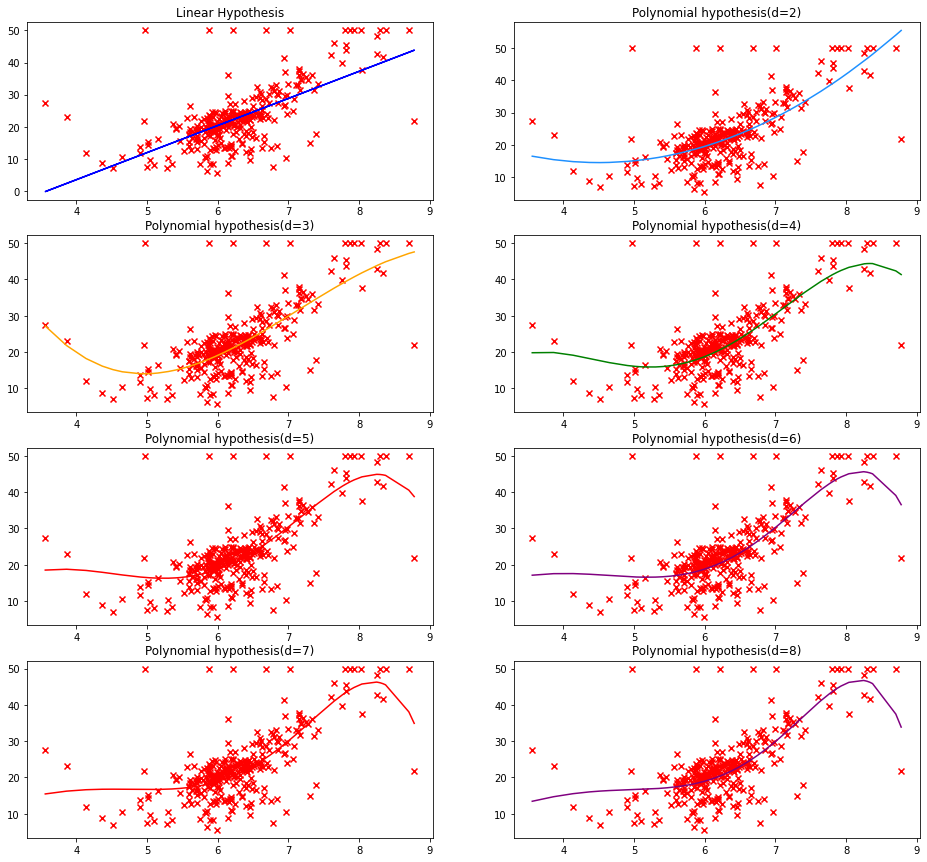

In [16]:
fig = plt.figure(figsize = (16,15))

ax11 = fig.add_subplot(4,2,1)
ax11.set_title("Linear Hypothesis")
ax11.plot(train_X.values, x_linear_train.dot(theta_linear), color='b')
ax11.scatter(train_X, train_Y, marker='x', c='r')

ax12 = fig.add_subplot(4,2,2)
ax12.set_title("Polynomial hypothesis(d=2)")
ax12.plot(X_2_train, yhat_2_train, color="dodgerblue")
ax12.scatter(train_X, train_Y, marker='x', c='r')

ax13 = fig.add_subplot(4,2,3)
ax13.set_title("Polynomial hypothesis(d=3)")
ax13.plot(X_3_train, yhat_3_train, color='orange')
ax13.scatter(train_X, train_Y, marker='x', c='r')

ax21 = fig.add_subplot(4,2,4)
ax21.set_title("Polynomial hypothesis(d=4)")
ax21.plot(X_4_train, yhat_4_train, color='green')
ax21.scatter(train_X, train_Y, marker='x', c='r')

ax22 = fig.add_subplot(4,2,5)
ax22.set_title("Polynomial hypothesis(d=5)")
ax22.plot(X_5_train, yhat_5_train, color='red')
ax22.scatter(train_X, train_Y, marker='x', c='r')

ax23 = fig.add_subplot(4,2,6)
ax23.set_title("Polynomial hypothesis(d=6)")
ax23.plot(X_6_train, yhat_6_train, color='purple')
ax23.scatter(train_X, train_Y, marker='x', c='r')

ax31 = fig.add_subplot(4,2,7)
ax31.set_title("Polynomial hypothesis(d=7)")
ax31.plot(X_7_train, yhat_7_train, color='red')
ax31.scatter(train_X, train_Y, marker='x', c='r')

ax32 = fig.add_subplot(4,2,8)
ax32.set_title("Polynomial hypothesis(d=8)")
ax32.plot(X_8_train, yhat_8_train, color='purple')
ax32.scatter(train_X, train_Y, marker='x', c='r')

plt.show()

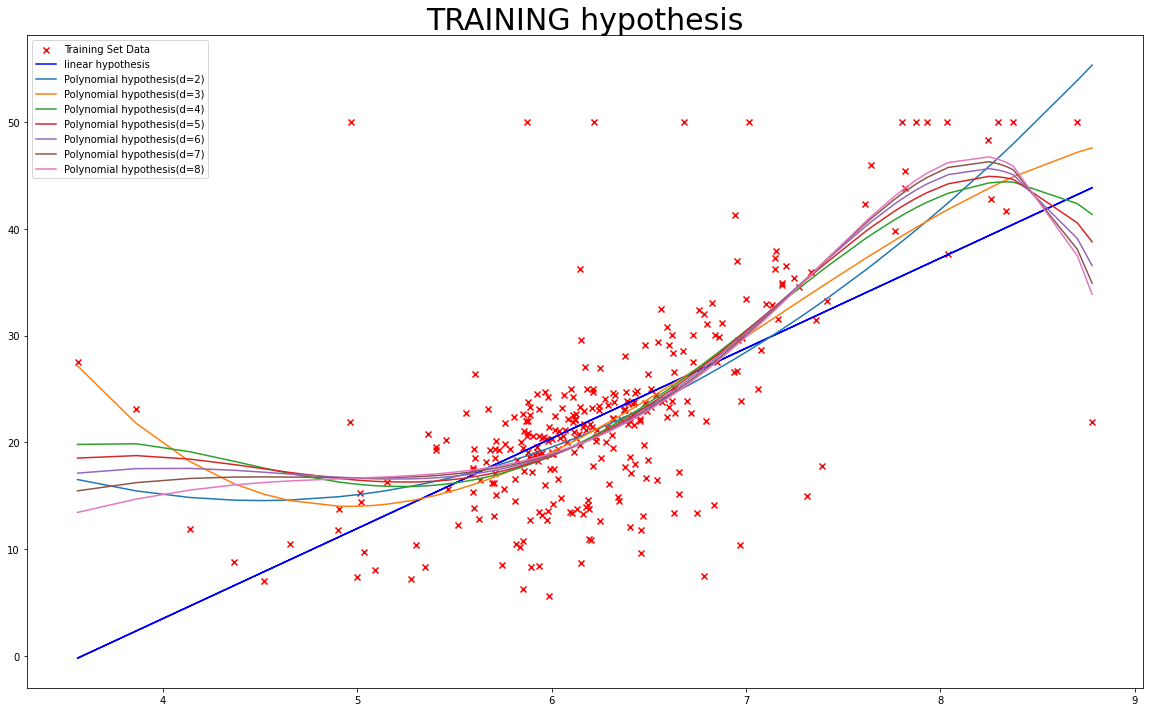

In [17]:
plt.figure(figsize=(20,12))
plt.scatter(train_X, train_Y, marker='x', c='r', label='Training Set Data')
plt.plot(train_X.values, x_linear_train.dot(theta_linear), label='linear hypothesis', c='b')
plt.plot(X_2_train, yhat_2_train, label='Polynomial hypothesis(d=2)')
plt.plot(X_3_train, yhat_3_train, label='Polynomial hypothesis(d=3)')
plt.plot(X_4_train, yhat_4_train, label='Polynomial hypothesis(d=4)')
plt.plot(X_5_train, yhat_5_train, label='Polynomial hypothesis(d=5)')
plt.plot(X_6_train, yhat_6_train, label='Polynomial hypothesis(d=6)')
plt.plot(X_7_train, yhat_7_train, label='Polynomial hypothesis(d=7)')
plt.plot(X_8_train, yhat_8_train, label='Polynomial hypothesis(d=8)')
plt.title('TRAINING hypothesis', fontsize=30)
plt.legend()
plt.show()



# Compute the error on the training and validations sets

## Prediction on Training Set

Uso la compute cost come metrica (Mean Squared Error)

In [18]:
def costVectorialRegularized(x,y, theta= np.zeros((x.shape[1],1)), lamb = 0.0):
    m = x.shape[0]

    J = 0
    
    elapsed_time = 0
    elapsed_time -= time.time()

    # il primo elemento non lo prendo
    J = (x.dot(theta) - y).T.dot((x.dot(theta) - y)) + lamb*(theta[1:].T.dot(theta[1:]))
    J = J/(2*m)

    elapsed_time += time.time()
    elapsed_time *= 1000 # porto i secondi in millisecondi
    
    return np.round(J[0],3), np.round(elapsed_time,3)

In [19]:
cost_linear_train, _ = costVectorialRegularized(x_linear_train,train_Y.values, theta_linear, lamb = 0.0)
cost_poly_2_train, _ = costVectorialRegularized(x_poly_2_train_int,train_Y.values, theta_poly_2, lamb = 0.0)
cost_poly_3_train, _ = costVectorialRegularized(x_poly_3_train_int,train_Y.values, theta_poly_3, lamb = 0.0)
cost_poly_4_train, _ = costVectorialRegularized(x_poly_4_train_int,train_Y.values, theta_poly_4, lamb = 0.0)
cost_poly_5_train, _ = costVectorialRegularized(x_poly_5_train_int,train_Y.values, theta_poly_5, lamb = 0.0)
cost_poly_6_train, _ = costVectorialRegularized(x_poly_6_train_int,train_Y.values, theta_poly_6, lamb = 0.0)
cost_poly_7_train, _ = costVectorialRegularized(x_poly_7_train_int,train_Y.values, theta_poly_7, lamb = 0.0)
cost_poly_8_train, _ = costVectorialRegularized(x_poly_8_train_int,train_Y.values, theta_poly_8, lamb = 0.0)

In [20]:
J_train_list = []
J_train_list.append(cost_linear_train[0])
J_train_list.append(cost_poly_2_train[0])
J_train_list.append(cost_poly_3_train[0])
J_train_list.append(cost_poly_4_train[0])
J_train_list.append(cost_poly_5_train[0])
J_train_list.append(cost_poly_6_train[0])
J_train_list.append(cost_poly_7_train[0])
J_train_list.append(cost_poly_8_train[0])

## Prediction on Validation Set


In [21]:
cost_linear_val, _ = costVectorialRegularized(x_linear_val,val_Y.values, theta_linear, lamb = 0.0)
cost_poly_2_val, _ = costVectorialRegularized(x_poly_2_val_int,val_Y.values, theta_poly_2, lamb = 0.0)
cost_poly_3_val, _ = costVectorialRegularized(x_poly_3_val_int,val_Y.values, theta_poly_3, lamb = 0.0)
cost_poly_4_val, _ = costVectorialRegularized(x_poly_4_val_int,val_Y.values, theta_poly_4, lamb = 0.0)
cost_poly_5_val, _ = costVectorialRegularized(x_poly_5_val_int,val_Y.values, theta_poly_5, lamb = 0.0)
cost_poly_6_val, _ = costVectorialRegularized(x_poly_6_val_int,val_Y.values, theta_poly_6, lamb = 0.0)
cost_poly_7_val, _ = costVectorialRegularized(x_poly_7_val_int,val_Y.values, theta_poly_7, lamb = 0.0)
cost_poly_8_val, _ = costVectorialRegularized(x_poly_8_val_int,val_Y.values, theta_poly_8, lamb = 0.0)

In [22]:
J_val_list = []
J_val_list.append(cost_linear_val.ravel()[0])
J_val_list.append(cost_poly_2_val[0])
J_val_list.append(cost_poly_3_val[0])
J_val_list.append(cost_poly_4_val[0])
J_val_list.append(cost_poly_5_val[0])
J_val_list.append(cost_poly_6_val[0])
J_val_list.append(cost_poly_7_val[0])
J_val_list.append(cost_poly_8_val[0])

# Trade-off between High Bias and High Variance wrt the polynomial degree "d"

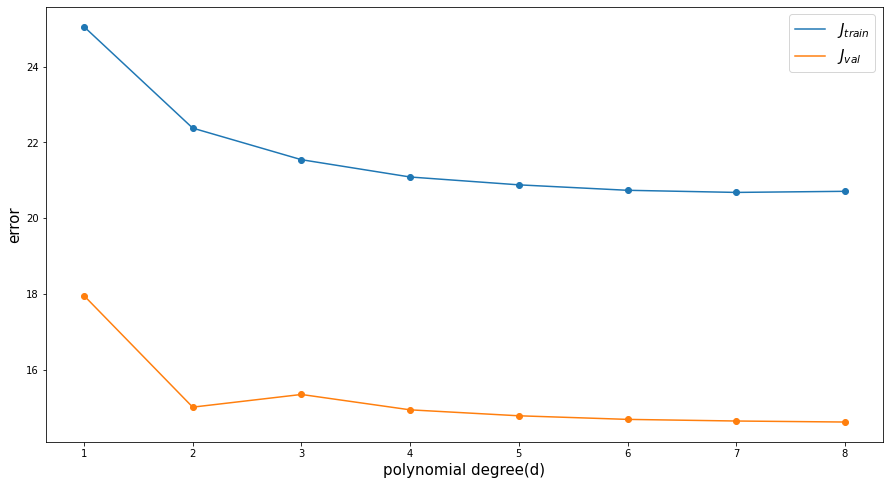

In [23]:
plt.figure(figsize=(15,8))

plt.scatter((np.arange(8)+1), J_train_list)
plt.plot((np.arange(8)+1), J_train_list, label= r'$J_{train}$')

plt.scatter((np.arange(8)+1), J_val_list)
plt.plot((np.arange(8)+1), J_val_list, label= r'$J_{val}$')

plt.xlabel("polynomial degree(d)", fontsize=15)
plt.ylabel("error", fontsize=15)
plt.legend(fontsize=15)
plt.show()

# Trade-off between High Bias and High Variance wrt regularization parameter

In [24]:
d = 6

xx_poly_train = polinomyal_features(train_X,d,input_feature)
xx_poly_val = polinomyal_features(val_X,d,input_feature)
xx_poly_test = polinomyal_features(test_X,d,input_feature)

xx_poly_train_int = np.c_[np.ones((xx_poly_train.shape[0],1)), xx_poly_train]
xx_poly_val_int = np.c_[np.ones((xx_poly_val.shape[0],1)), xx_poly_val]
xx_poly_test_int = np.c_[np.ones((xx_poly_test.shape[0],1)), xx_poly_test]


In [25]:
lambda_values = [10000, 100000, 1000000, 10000000, 100000000, 10000000000, 100000000000, 1000000000000]

In [26]:
J_train_reg = []
J_val_reg = []

for lambd in lambda_values:
    theta_poly_xx, _ = normalEquationReg(xx_poly_train_int, train_Y, lambd)
    ## qui il lambda non serve nel calcolo del singolo costo, il lambda serviva nella normal equation(o gradient descent alternativamente)
    J_train_xx, _ = costVectorialRegularized(xx_poly_train_int, train_Y.values, theta=theta_poly_xx)
    J_val_xx, _ = costVectorialRegularized(xx_poly_val_int, val_Y.values, theta=theta_poly_xx)
    J_train_reg.append(J_train_xx)
    J_val_reg.append(J_val_xx)
    

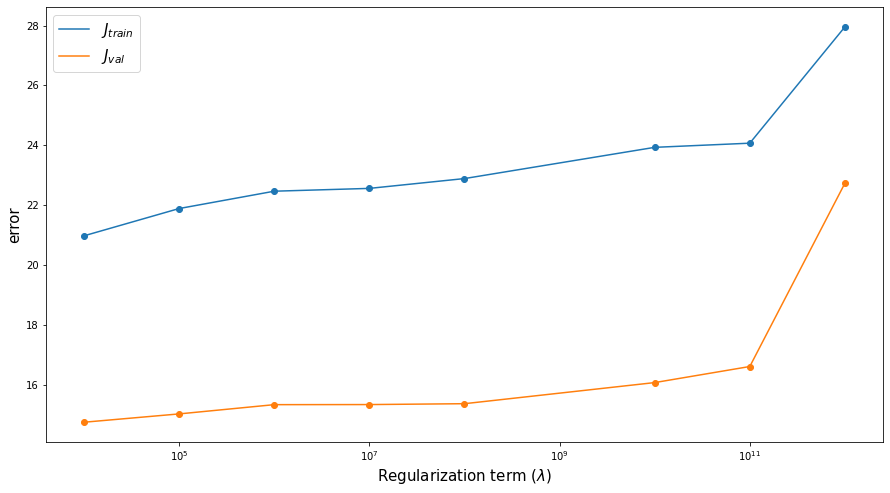

In [74]:
plt.figure(figsize=(15,8))

plt.scatter(lambda_values, J_train_reg)
plt.plot(lambda_values, J_train_reg, label= r'$J_{train}$')

plt.scatter(lambda_values, J_val_reg)
plt.plot(lambda_values, J_val_reg, label= r'$J_{val}$')

plt.xlabel(r"Regularization term ($\lambda$)", fontsize=15)
plt.ylabel("error", fontsize=15)

plt.xscale('log')

plt.legend(fontsize=15)
plt.show()

# TRADE-OFF between training set size  for the learning curves

In [28]:
# Il validation deve rimanere costante al variare del training set

In [99]:
#scegliamo il caso 3 come just-right
x_poly_3_train_lc = polinomyal_features(train_X,1,input_feature)
x_poly_3_val_lc = polinomyal_features(val_X,1,input_feature)

x_poly_3_train_int_lc = np.c_[np.ones((x_poly_3_train_lc.shape[0],1)), x_poly_3_train_lc]
x_poly_3_val_int_lc = np.c_[np.ones((x_poly_3_val_lc.shape[0],1)), x_poly_3_val_lc]

In [100]:
n_iter = 45
delta = int(np.ceil(train_X.shape[0]/n_iter))

J_train_lc_list = []
J_val_lc_list = []
training_set_size_list = []

for i in range(1,n_iter):
    theta_lc, _= normalEquationReg(x_poly_3_train_int_lc[:delta*i], train_Y[:delta*i])
    
    J_train_lc, _ = costVectorialRegularized(x_poly_3_train_int_lc[:delta*i],train_Y.values[:delta*i], theta_lc)
    J_val_lc, _ = costVectorialRegularized(x_poly_3_val_int_lc,val_Y.values, theta_lc)
    J_train_lc_list.append(J_train_lc[0])
    J_val_lc_list.append(J_val_lc[0])
    training_set_size_list.append(delta*i)
    

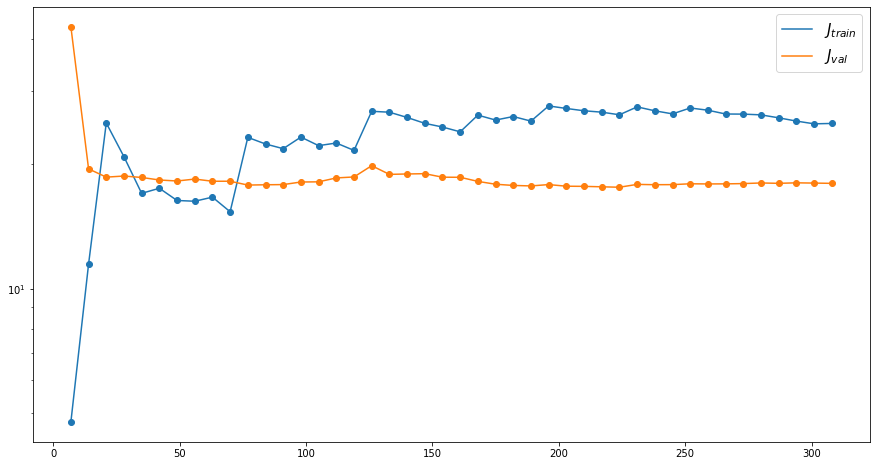

In [101]:
plt.figure(figsize = (15,8))

plt.scatter(training_set_size_list, J_train_lc_list)
plt.plot(training_set_size_list, J_train_lc_list, label=r'$J_{train}$')

plt.scatter(training_set_size_list, J_val_lc_list)
plt.plot(training_set_size_list, J_val_lc_list, label=r'$J_{val}$')

plt.yscale('log')


plt.legend(fontsize=15)
plt.show()